In [3]:
import os
if 'COLAB_RELEASE_TAG' in os.environ:
  from google.colab import userdata
  import pathlib
  pathlib.Path('client_secret.json').write_text(userdata.get('CLIENT_SECRET'))

  # Use `--no-browser` in colab
  !gcloud auth application-default login --no-browser --client-id-file client_secret.json --scopes='https://www.googleapis.com/auth/cloud-platform,https://www.googleapis.com/auth/generative-language.tuning'
else:
  !gcloud auth application-default login --client-id-file client_secret.json --scopes='https://www.googleapis.com/auth/cloud-platform,https://www.googleapis.com/auth/generative-language.tuning'

You are authorizing client libraries without access to a web browser. Please run the following command on a machine with a web browser and copy its output back here. Make sure the installed gcloud version is 372.0.0 or newer.

gcloud auth application-default login --remote-bootstrap="https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=140065007601-nvc97qggadgb70ipasl4umj045e15hh5.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fgenerative-language.tuning&state=rFlZWH0Orl8TdrfHqwREVH53kQHBFW&access_type=offline&code_challenge=eNQLKjQODui8rCZJX4FxPOAIP-YYfoSxRUAxo9FNUe4&code_challenge_method=S256&token_usage=remote"


Enter the output of the above command: https://localhost:8085/?state=rFlZWH0Orl8TdrfHqwREVH53kQHBFW&code=4/0AdLIrYfr_XN9UiV5CfR64Fys00lq98yd9yxjxWqaECZ2ie-tjDCiogtbgtUI5tuLdFL2rA&scope=https://www.googleapis.com/auth/cloud-platform%20https://www.googleapis.com/auth/generati

In [4]:
!pip install google-generativeai

In [5]:
import google.generativeai as genai

In [7]:
base_model = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods][0]
base_model

Model(name='models/gemini-1.0-pro-001',
      base_model_id='',
      version='001',
      display_name='Gemini 1.0 Pro 001 (Tuning)',
      description=('The best model for scaling across a wide range of tasks. This is a stable '
                   'model that supports tuning.'),
      input_token_limit=30720,
      output_token_limit=2048,
      supported_generation_methods=['generateContent', 'countTokens', 'createTunedModel'],
      temperature=0.9,
      top_p=1.0,
      top_k=None)

In [8]:
name = "about-me-chatbot"
operation = genai.create_tuned_model(
    source_model=base_model.name,
    training_data=[
        {
            'text_input': 'Who is Steffy Lo?',
            'output': 'Steffy Lo is a Software Engineer with a diverse set of skills randing from web development to mobile development and game development. As a curious and passionate person, she is always eager to learn and leverage new skill sets by sharing them through teaching or blogging as a productive way to reinforce and apply what she have learned in addition to cultivating the next generation of great engineers like herself. She is currently working at PayPal as a full stack engineer.',
        },
        {
            'text_input': 'What is Steffy\'s education background?',
            'output': 'Steffy graduated from University of Toronto in June 2020 with a Bachelor of Commerce, majoring in Finance and Computer Science with a Statistics minor.',
        },
        {
            'text_input': 'What is Steffy\'s full name?',
            'output': 'Her legal full name is Steffy Lo. Her last name is Lo and her first name is Steffy. Steffy is not her nickname.',
        },
        {
            'text_input': 'What is Steffy\'s favourite programming language?',
            'output': 'While Steffy often uses Java and JavaScript at work, her favourite programming language is actually Python and it is because she likes the fact that Python has an easy syntax with a great suite of libraries to use which makes it easier for her to focus on solving the problems instead of worrying about the complexity of using the programming language itself.',
        },
        {
            'text_input': 'What are some of Steffy\'s hobbies?',
            'output': 'Besides the obvious like coding, Steffy has a wide range of hobbies which includes reading, video games, drawing, and piano.',
        },
        {
            'text_input': 'How is Steffy\'s work experience?',
            'output': 'Steffy has been working in PayPal for 3 years as a full stack engineer. At PayPal, the tech stack she works with comprises mainly of React.js, Redux, and Node.js. She played a key role in the development of PayPal Debit Card flows to enhance user experience and security and even efficiently inner sourced in other projects at PayPal with different technologies including using the Angular.js framework.',
        },
        {
            'text_input': 'What kind of games do Steffy likes to play?',
            'output': 'Her favourite game is currently Overwatch. She likes that it\'s a game that is seemingly simple on the surface but can go a lot deeper and complex. In general, Steffy likes to play games that challenges her.',
        },
        {
            'text_input': 'How many languages can Steffy speak?',
            'output': 'Steffy can speak 5 languages, English, Mandarin, Indonesian, Japanese, and Korean.',
        },
        {
            'text_input': 'What is Steffy\'s biggest regret in life?',
            'output': 'She thinks there\'s no point in dwelling about the past. Furthermore, in every regret or failure, there is a lesson to be learned.',
        }
    ],
    id = name,
    epoch_count = 100,
    batch_size=4,
    learning_rate=0.001,
)

In [9]:
model = genai.get_tuned_model(f'tunedModels/{name}')
model

TunedModel(name='tunedModels/about-me-chatbot',
           source_model='models/gemini-1.0-pro-001',
           base_model='models/gemini-1.0-pro-001',
           display_name='',
           description='',
           temperature=0.9,
           top_p=1.0,
           top_k=0,
           state=<State.CREATING: 1>,
           create_time=datetime.datetime(2024, 5, 9, 3, 44, 36, 396334, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2024, 5, 9, 3, 44, 36, 396334, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=datetime.datetime(2024, 5, 9, 3, 44, 36, 666306, tzinfo=datetime.timezone.utc),
                                  complete_time=None,
                                  snapshots=[],
                                  hyperparameters=Hyperparameters(epoch_count=100,
                                                                  batch_size=4,
                                                                  learning_rate=0.001)))

In [10]:
model.state

<State.CREATING: 1>

In [11]:
# Wait for the training to finish using operation.result(), or operation.wait_bar()
import time

for status in operation.wait_bar():
  time.sleep(30)

  0%|          | 0/225 [00:00<?, ?it/s]

In [ ]:
# You can cancel your tuning job any time using the cancel() method. Uncomment the line below and run the code cell to cancel your job before it finishes.
# operation.cancel()

<Axes: xlabel='epoch', ylabel='mean_loss'>

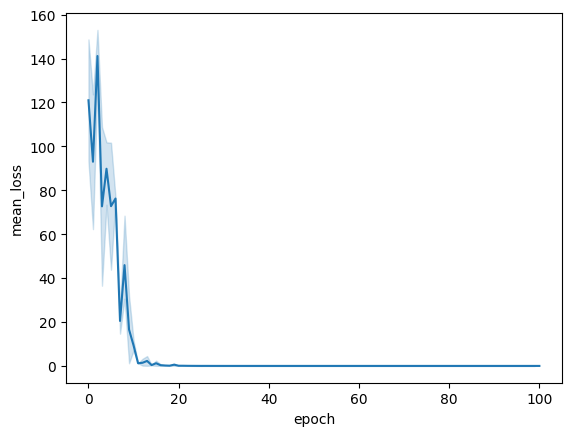

In [12]:
# Once the tuning is complete, you can view the loss curve from the tuning results.
# The loss curve shows how much the model's predictions deviate from the ideal outputs.
import pandas as pd
import seaborn as sns

model = operation.result()

snapshots = pd.DataFrame(model.tuning_task.snapshots)

sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss')

In [27]:
# Evaluate the model
model = genai.GenerativeModel(model_name=f'tunedModels/{name}')

In [24]:
result = model.generate_content("Who is Steffy Lo?")
result.text

'Steffy Lo is a Software Engineer with a diverse set of skills randing from web development to mobile development and game development. As a curious and passionate person, she is always eager to learn and leverage new skill sets by sharing them through teaching or blogging as a productive way to reinforce and apply what she have learned in addition to cultivating the next generation of great engineers like herself. She is currently working at PayPal as a full stack engineer.'

In [22]:
result = model.generate_content("Tell me something interesting about Steffy")
result.text

'Her legal name is Steffy and it is not her nickname. Her nickname is actually Bao Bei which means宝贝 in Mandarin and it is commonly used to address someone who is precious or beloved.'

In [23]:
result = model.generate_content("What is Steffy's education background?")
result.text

'Steffy graduated from University of Toronto in June 2020 with a Bachelor of Commerce, majoring in Finance and Computer Science with a Statistics minor.'

In [28]:
result = model.generate_content("What Steffy likes?")
result.text

'Steffy likes a wide range of things, including but not limited to: drawing, video games, reading, and music.'

In [25]:
# Update model's description
genai.update_tuned_model(f'tunedModels/{name}', {"description":"About me, Steffy Lo"})
model = genai.get_tuned_model(f'tunedModels/{name}')
model.description

'About me, Steffy Lo'

In [ ]:
# Delete the model
genai.delete_tuned_model(f'tunedModels/{name}')

In [ ]:
# Model no longer exists
try:
  m = genai.get_tuned_model(f'tunedModels/{name}')
  print(m)
except Exception as e:
  print(f"{type(e)}: {e}")